In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_svmlight_file
import pdb
from sklearn import svm, linear_model
from sklearn.ensemble import RandomForestClassifier

In [2]:
#loading sparse data stored as compressed row matrix
from itertools import izip_longest
import csv
#load training data and save it in concat.txt
with open('dexter_train.labels', 'rb') as csv1,open('dexter_train.data', 'rb') as csv2,open('concat.txt', 'w') as out:
    spam1 = csv.reader(csv1)
    spam2 = csv.reader(csv2)
    last_column=list(izip_longest(*spam2))[-1]
    for i,j in  izip_longest(spam1,last_column):
        out.write(','.join([t.strip(';') for t in i])+' '+j+'\n')
#load validating data and save it in valid.txt         
with open('dexter_valid.labels', 'rb') as csv1,open('dexter_valid.data', 'rb') as csv2,open('valid.txt', 'w') as out:
    spam1 = csv.reader(csv1)
    spam2 = csv.reader(csv2)
    last_column=list(izip_longest(*spam2))[-1]
    for i,j in  izip_longest(spam1,last_column):
        out.write(','.join([t.strip(';') for t in i])+' '+j+'\n')

In [3]:
#load data to Python
trainLabl=np.genfromtxt('dexter_train.labels')
TrainData = load_svmlight_file("concat.txt")
valid=load_svmlight_file('valid.txt')

In [4]:
Xtrain=TrainData[0] #training data
Ytrain=TrainData[1] #training abels
Xvalid=valid[0] #testing data
Yvalid=valid[1] #testing labels
pMask=(Yvalid==1) #indices of positive class on validation set
nMask=(Yvalid==-1)#indices of negative class on validation set


As a measure of correctnes we will use Balanced Error Rate:

$$BEF=\displaystyle \frac{1}{2} \left(  
\frac{\text{# positive instances predicted wrong} }{  \text{ # positive instances} } 
+ \frac{\text{ # negative instances predicted wrong}}{\text{# negetive instances}}  \right)$$


In [5]:
def BalancedErrorRate(posMask, negMask, Predict):
    Psvm=Predict[posMask]+Yvalid[posMask] #if zero, then worng prediction on positive class
    Nsvm=Predict[negMask]+Yvalid[negMask] #if zero, then worng prediction on negative class
    errorPsvm=np.sum(Psvm==0) #total number of wrong predicted positive instances
    errorNsvm=np.sum(Nsvm==0) #total number of wrong predicted negative instances
    numPos=np.sum(posMask) #total number of true positive instances
    numNeg=np.sum(negMask) #total number of true negative instances
#     print('number of wrong predicted positive instances',errorPsvm, 'number of wrong predicted negative instances',errorNsvm)
#     print('number of true negative instances',numPos, 'number of true negative instances', numNeg)
    bef= 1.0/2*(errorPsvm*1.0/numPos+errorNsvm*1.0/numNeg)*100
#     print('BEF', bef)
    return bef

In [6]:
# try Support Vector Machine on the given data
clf = svm.SVC()
clf.fit(Xtrain, Ytrain) #train classifier
PredictSVM=clf.predict(Xvalid) # test on the validation set
# error= (# wrong prediction)/(total #)
print np.sum(PredictSVM!=Yvalid)/(1.*len(Yvalid))*100
BEF = BalancedErrorRate(pMask, nMask, PredictSVM)
print('BEF', BEF)

50.0
('BEF', 50.0)


###SVM  gives 50% error

In [8]:
# random forests
s=0
N=20
for j in range(N):
#     clf = RandomForestClassifier() #select any subset of features 
    clf = RandomForestClassifier(max_features=7375) #max number of selected features can be max_features
    clf.fit(Xtrain.todense(), Ytrain)  #train Random Forest
    PredictRF=clf.predict(Xvalid) #test RF
    BEF = BalancedErrorRate(pMask, nMask, PredictRF)
    s += BEF
#     aveErr=np.sum(PredictRF!=Yvalid)/(1.*len(Yvalid))*100 #for calcualting average errir
#     s+=aveErr
#     print('wrong prediction',j, aveErr)  
    print( j,'BEF', BEF)
    PredictRF=None
s=s/N
print('average error',s)

(0, 'BEF', 10.0)
(1, 'BEF', 12.333333333333334)
(2, 'BEF', 10.333333333333334)
(3, 'BEF', 8.0)
(4, 'BEF', 14.000000000000002)
(5, 'BEF', 15.000000000000002)
(6, 'BEF', 11.333333333333334)
(7, 'BEF', 11.0)
(8, 'BEF', 9.0)
(9, 'BEF', 8.0)
(10, 'BEF', 9.3333333333333339)
(11, 'BEF', 10.666666666666668)
(12, 'BEF', 8.0)
(13, 'BEF', 9.6666666666666661)
(14, 'BEF', 10.0)
(15, 'BEF', 10.666666666666666)
(16, 'BEF', 9.6666666666666679)
(17, 'BEF', 12.0)
(18, 'BEF', 9.6666666666666661)
(19, 'BEF', 10.0)
('average error', 10.433333333333332)


### Random Forests, any number of features, give 17% errror
### Random Forests, maximum 7375 number of features , give 10.97% errror

In [9]:
# Lasso
alpha=1
for i in range(10):
    clf = linear_model.Lasso(alpha)
    clf.fit(Xtrain, Ytrain) #train Lasso
    PredictL=clf.predict(Xvalid) #test Lasso, predict Values 
    PredictL[PredictL>=0]=1 #for positive values predict positive class
    PredictL[PredictL<0]=-1 #for negative values predict negative class
    BEF = BalancedErrorRate(pMask, nMask, PredictL)
    print( i,'BEF', BEF)
    PredictL=None # delete values 
    alpha=0.8*alpha # decrease alpha

(0, 'BEF', 9.6666666666666661)
(1, 'BEF', 10.0)
(2, 'BEF', 9.6666666666666661)
(3, 'BEF', 10.0)
(4, 'BEF', 10.0)
(5, 'BEF', 9.6666666666666661)
(6, 'BEF', 9.3333333333333321)
(7, 'BEF', 9.3333333333333321)
(8, 'BEF', 9.6666666666666661)
(9, 'BEF', 10.0)


###Lasso about 10%error, but try to combine with SVM

In [10]:
# Lasso and SVM
lam=0.5
s=0 #for computing average accuracy
for i in range(15):
    clf=svm.LinearSVC(penalty='l1', dual=False, C=lam)
    clf.fit(Xtrain, Ytrain)
    PredictLSVM=clf.predict(Xvalid)
    BEF = BalancedErrorRate(pMask, nMask, PredictLSVM)
    print( i,'BEF', BEF)
    s+=np.sum(PredictLSVM!=Yvalid)/(1.*len(Yvalid))*100
#     print(np.sum(Predict!=Yvalid)/(1.*len(Yvalid))*100, lam)
    lam=0.7*lam
    PredictLSVM=None
    
print('average',s/15)

(0, 'BEF', 8.6666666666666679)
(1, 'BEF', 10.666666666666666)
(2, 'BEF', 9.3333333333333339)
(3, 'BEF', 9.3333333333333339)
(4, 'BEF', 12.000000000000002)
(5, 'BEF', 11.0)
(6, 'BEF', 10.666666666666666)
(7, 'BEF', 9.0)
(8, 'BEF', 10.666666666666666)
(9, 'BEF', 10.333333333333334)
(10, 'BEF', 9.3333333333333339)
(11, 'BEF', 9.3333333333333339)
(12, 'BEF', 10.333333333333334)
(13, 'BEF', 10.0)
(14, 'BEF', 11.333333333333334)
('average', 10.133333333333333)


# gives 8.3% error, but random, every time different error

In [12]:
mask1=Ytrain== 1 # indices for positive class
mask2=Ytrain==-1 # indices for negative class
Xtrain_dense=Xtrain.todense()
Xvalid_dense=Xvalid.todense()
# Xvalid_dense=Xvalid
# normalize each row fo the data
for i in range(Xtrain.shape[0]):
#     pdb_settrace()
    Xtrain_dense[i,:]=Xtrain_dense[i,:] / np.linalg.norm(Xtrain_dense[i,:], ord=2)
    Xvalid_dense[i,:]=Xvalid_dense[i,:] / np.linalg.norm(Xvalid_dense[i,:], ord=2)
    
X1=Xtrain_dense[mask1,:] # positive points
X2=Xtrain_dense[mask2,:] # negative points

mean1=X1.mean(0) # mean of each column for positive points
mean2=X2.mean(0) # mean of each column for negative points
M1=np.squeeze(np.asarray(mean1))
M2=np.squeeze(np.asarray(mean2))
print X1.shape, X2.shape,mean1.shape,mean2.shape, Xtrain.shape
print M1.shape, M2.shape

(150, 19999) (150, 19999) (1, 19999) (1, 19999) (300, 19999)
(19999,) (19999,)


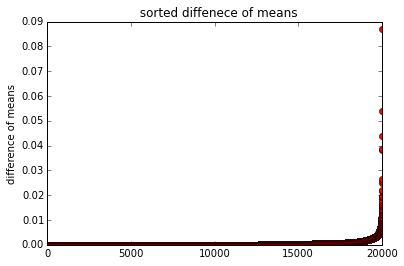

In [13]:
plt.plot(np.sort(abs(M1-M2)),'ro')
plt.title('  sorted diffenece of means ')
plt.ylabel('difference of means')
# plt.xlabel('features')
plt.savefig('mean.pdf')

In [25]:
mask=abs(M1-M2)>0.005 # set threshhold for choosing features
print('number of features to keep ', np.sum(mask))
XtrainNew=Xtrain[:,mask] # select appropriate features

#use SVM on new data
clf = svm.SVC()
clf.fit(XtrainNew, Ytrain) # train the model
PredictSVMnew = clf.predict(Xvalid[:,mask]) # test the model
# print np.sum(PredictSVMnew!=Yvalid)/(1.*len(Yvalid))*100
BEF = BalancedErrorRate(pMask, nMask, PredictSVMnew)
print('BEF', BEF)



('number of features to keep ', 183)
('BEF', 49.666666666666671)


In [30]:
# use Lasso
alpha=1
average_error=0
for i in range(20):
    clf = linear_model.Lasso(alpha)
    clf.fit(XtrainNew, Ytrain)
    PredictL=clf.predict(Xvalid[:,mask])
    PredictL[PredictL>=0]=1
    PredictL[PredictL<0]=-1
#     print np.sum(PredictL!=Yvalid)/(1.*len(Yvalid))*100  
    BEF=BalancedErrorRate(pMask, nMask, PredictL)
    print( i, 'BEF', BEF)
    PredictL=None
    alpha=0.8*alpha
    average_error+=BEF

print('average error', average_error/i)

(0, 'BEF', 9.6666666666666679)
(1, 'BEF', 9.0)
(2, 'BEF', 9.6666666666666679)
(3, 'BEF', 9.6666666666666679)
(4, 'BEF', 9.6666666666666679)
(5, 'BEF', 9.3333333333333339)
(6, 'BEF', 9.6666666666666679)
(7, 'BEF', 9.6666666666666679)
(8, 'BEF', 10.0)
(9, 'BEF', 11.666666666666666)
(10, 'BEF', 12.666666666666668)
(11, 'BEF', 13.666666666666666)
(12, 'BEF', 14.333333333333334)
(13, 'BEF', 15.0)
(14, 'BEF', 15.333333333333332)
(15, 'BEF', 15.333333333333332)
(16, 'BEF', 15.666666666666668)
(17, 'BEF', 16.0)
(18, 'BEF', 16.666666666666664)
(19, 'BEF', 17.0)
('average error', 13.140350877192983)


In [33]:
#Random Forests

s=0
N=20
for j in range(N):
#     clf = RandomForestClassifier()
    clf = RandomForestClassifier()
    clf.fit(XtrainNew, Ytrain)   #train
    PredictRF=clf.predict(Xvalid[:,mask]) #classify
#     s+=np.sum(PredictRF!=Yvalid)/(1.*len(Yvalid))*100
#     print(np.sum(PredictRF!=Yvalid)/(1.*len(Yvalid))*100)
    BEF=BalancedErrorRate(pMask, nMask, PredictRF)
    s+=BEF
    print( j,'BEF', BEF)
    PredictRF=None
    
print s/N

(0, 'BEF', 9.3333333333333339)
(1, 'BEF', 11.666666666666666)
(2, 'BEF', 11.0)
(3, 'BEF', 9.6666666666666661)
(4, 'BEF', 11.0)
(5, 'BEF', 12.0)
(6, 'BEF', 11.0)
(7, 'BEF', 10.666666666666666)
(8, 'BEF', 10.0)
(9, 'BEF', 11.333333333333334)
(10, 'BEF', 12.333333333333334)
(11, 'BEF', 7.333333333333333)
(12, 'BEF', 9.0)
(13, 'BEF', 8.6666666666666679)
(14, 'BEF', 8.6666666666666679)
(15, 'BEF', 12.666666666666664)
(16, 'BEF', 10.0)
(17, 'BEF', 8.6666666666666679)
(18, 'BEF', 9.6666666666666679)
(19, 'BEF', 9.0)
10.1833333333


### Computing mean and picking features that have big mean differences for different classes improved random forest but not svm

(300,)


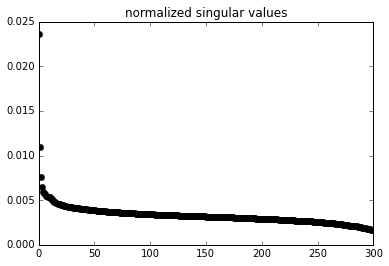

In [35]:
# transpose and take SVD to find relevant features
# then do classification using those features
Xdense=(Xtrain-Xtrain.mean(1)).T 
U,S,V=np.linalg.svd(Xdense, full_matrices=False)
sigma=S/np.sum(S)
print (S**2).shape
plt.plot(sigma,'ko')
plt.title('normalized singular values')
plt.savefig('svals.pdf')

In [37]:
NewFeatures=np.diag(S)*V.T # select new features
NewFeatures=NewFeatures.T  # transpose back to the original shape

In [40]:
# Run Random Forests
s=0
N=20
for j in range(20):
#     clf = RandomForestClassifier()
    clf = RandomForestClassifier()
    clf.fit(NewFeatures, Ytrain)  
    PredictRF=clf.predict(Xvalid*U)
    BEF=BalancedErrorRate(pMask, nMask, PredictRF)
    print( j,'BEF', BEF)
    s+=BEF
    PredictRF=None
s=s/N
print s

(0, 'BEF', 50.666666666666671)
(1, 'BEF', 50.666666666666657)
(2, 'BEF', 50.333333333333343)
(3, 'BEF', 46.666666666666664)
(4, 'BEF', 49.333333333333336)
(5, 'BEF', 52.333333333333329)
(6, 'BEF', 50.666666666666657)
(7, 'BEF', 44.666666666666664)
(8, 'BEF', 51.333333333333329)
(9, 'BEF', 50.0)
(10, 'BEF', 49.666666666666671)
(11, 'BEF', 52.666666666666671)
(12, 'BEF', 50.0)
(13, 'BEF', 55.333333333333336)
(14, 'BEF', 44.333333333333336)
(15, 'BEF', 46.666666666666664)
(16, 'BEF', 51.0)
(17, 'BEF', 51.666666666666657)
(18, 'BEF', 50.666666666666657)
(19, 'BEF', 49.666666666666664)
49.9166666667


#### SVD is bad since we are loosing too much information